Size: 10x10, Time: 0.0005125999 seconds
Size: 110x110, Time: 0.2215232849 seconds
Size: 210x210, Time: 1.9967730045 seconds
Size: 310x310, Time: 6.3826260567 seconds
Size: 410x410, Time: 14.5364935398 seconds
Size: 510x510, Time: 32.4849259853 seconds
Size: 610x610, Time: 60.4203987122 seconds
Size: 710x710, Time: 54.5299296379 seconds
Size: 810x810, Time: 61.8573520184 seconds
Size: 910x910, Time: 113.5332014561 seconds


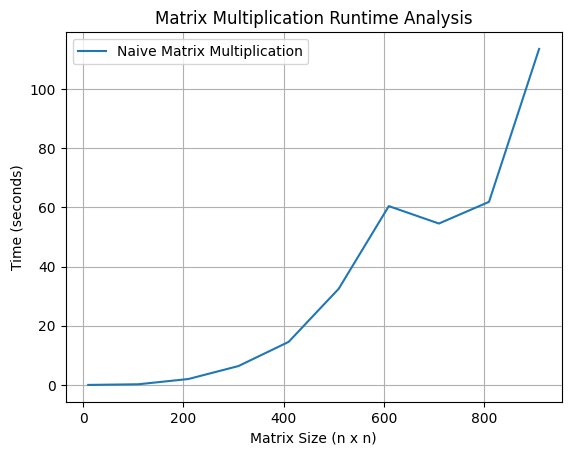

In [27]:
#Task 1(a-b):
#Implement the standard matrix multiplication algorithm using Python without using any pre-built matrix multiplication functions.
#Analyze and benchmark the runtime of your algorithm on each matrix size.
#Use the Python time module to record the time taken for each matrix size.

import time
import random
import matplotlib.pyplot as plt

# Part (a): Implement the basic matrix multiplication
def matrix_multiplication(matrix_A, matrix_B):
    #n is the length of a matrix
    n = len(matrix_A)
    # Initialize an n x n result matrix product
    matrix_product = [[0] * n for _ in range(n)] 
    # Miltiplying a row in matrix A by...
    for i in range(n):
        #.... by a column in matrix B
        for j in range(n):
            for k in range(n):
                # product of multiplied row of matrix A and column of Matrix B
                matrix_product[i][j] += matrix_A[i][k] * matrix_B[k][j]
    return matrix_product

# Generate a random n x n matrix
def generate_random_square_matrix(n):
    return [[random.randint(0, 10) for _ in range(n)] for _ in range(n)]

# Part (b): Benchmark the runtime of the algorithm for different matrix sizes
# Lets create a matrix sizes from 10 to 1000 with a step of 100
matrix_sizes = range(10, 1000, 100)  
naive_times = []

for size in matrix_sizes:
    matrix_A = generate_random_square_matrix(size)
    matrix_B = generate_random_square_matrix(size)
    # starting the time of calculation
    start_time = time.time()
    matrix_multiplication(matrix_A, matrix_B)
    # ending the time of calculation
    end_time = time.time()
    
    # real time that was needed to run the calculation
    elapsed_time = end_time - start_time
    naive_times.append(elapsed_time)
    print(f"Size: {size}x{size}, Time: {elapsed_time:.10f} seconds")

# Plotting the results and creating a diagramm
plt.plot(matrix_sizes, naive_times, label='Naive Matrix Multiplication')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Time (seconds)')
plt.title('Matrix Multiplication Runtime Analysis')
plt.grid()
plt.legend()
plt.show()



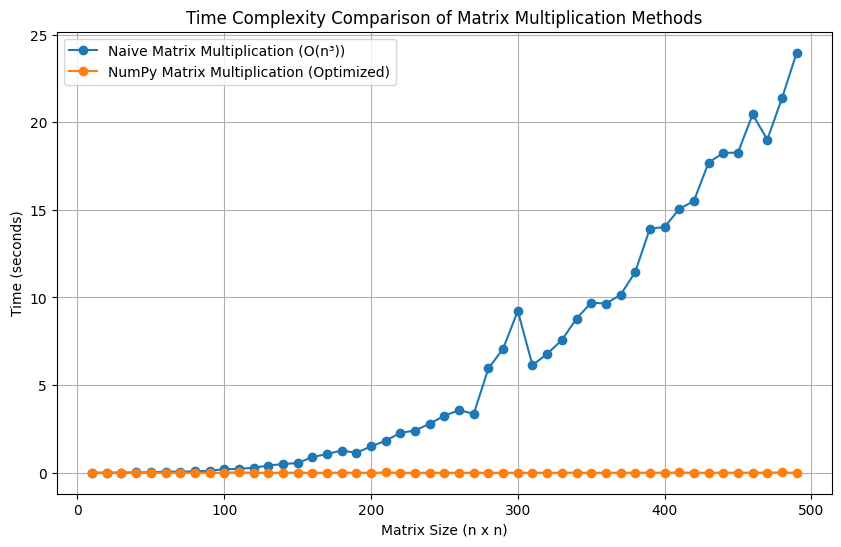

In [28]:
#Task 1(c):
#Compare your implementation with the built-in matrix multiplication in NumPy.
#Plot the time complexity for both methods as the matrix size increases.

import numpy as np
import time
import matplotlib.pyplot as plt

# Step 1: Implement naive matrix multiplication with Numba optimization

def naive_matrix_multiplication(matrix_A, matrix_B):
    n = len(matrix_A)
    result = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += matrix_A[i][k] * matrix_B[k][j]
    return result

# Step 2: Define the function to benchmark both implementations
def benchmark_matrix_multiplications(sizes):
    naive_times = []
    numpy_times = []
    
    for n in sizes:
        # Generate two random matrices of size n x n
        matrix_A = np.random.rand(n, n)
        matrix_B = np.random.rand(n, n)
        
        # Time naive implementation
        start_time = time.time()
        naive_matrix_multiplication(matrix_A.tolist(), matrix_B.tolist())  # Convert to lists for naive function
        naive_times.append(time.time() - start_time)
        
        # Time NumPy's built-in matrix multiplication
        start_time = time.time()
        np.dot(matrix_A, matrix_B)
        numpy_times.append(time.time() - start_time)
    
    return naive_times, numpy_times

# Step 3: Define smaller sizes of matrices and benchmark
matrix_sizes = range(10, 500, 10)  # Test smaller matrix sizes (10x10 to 500x500)
naive_times, numpy_times = benchmark_matrix_multiplications(matrix_sizes)

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, naive_times, label="Naive Matrix Multiplication (O(n³))", marker='o')
plt.plot(matrix_sizes, numpy_times, label="NumPy Matrix Multiplication (Optimized)", marker='o')
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time (seconds)")
plt.title("Time Complexity Comparison of Matrix Multiplication Methods")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Task 1(d):
#Explain the time complexity of both your implementation and the NumPy implementation.
#Why do they differ?

# From the graphic above we can see that NumPy is way faster than Naive multiplication, as NumPy solves a 400x400 matrix in less than 0.005 seconds 
# while the Naive multiplication needs at least 14 seconds.
# The naive algorithm has a time complexity of O(n^3), which makes it inefficient for large matrices.
# The big O stands for the notation to measure the speed of a growing function and n^3 stands for the 3 nested loops.
# Each loop is for a row, for a column and then for the sum of the products of the matrix.
# NumPy in the contrary to the Naive Multiplication, changes its algorithm based on the size of the matrix and it uses more efficient algorithm the bigger the matrix becomes
# while Naive multiplication always stays at O(n^3), and therefore gets slower, the bigger the matrix becomes
# In conclusion, NumPy is more efficient for larger matrices, as it adapts its algorithmus in order to find the optimal complexity for the given matrix, as we wil see in 1(e).

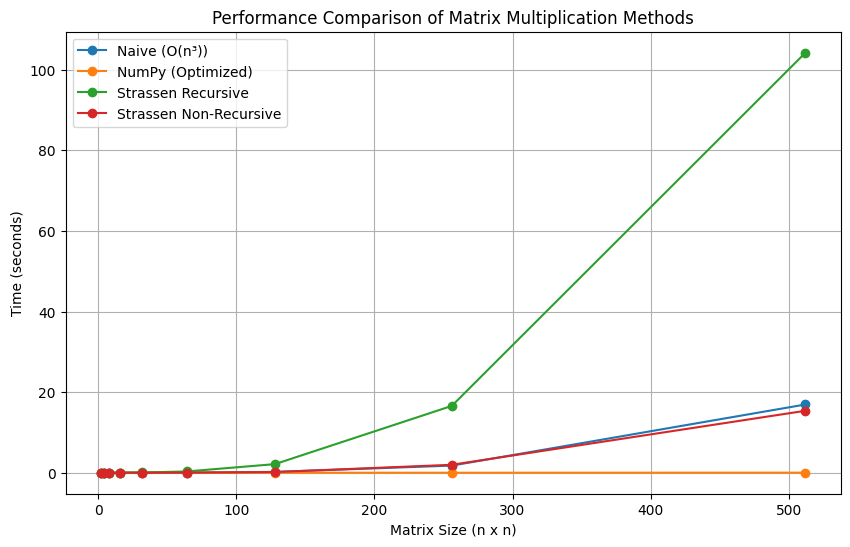

In [ ]:
#Task 1(e):
#Implement a simple version of Strassen's algorithm for two-dimensional matrices(with and without the recursion)
#and compare its persormance with your naive approach and your implementation with NumPy.

import numpy as np
import time
import matplotlib.pyplot as plt


# Naive matrix multiplication (O(n^3))
def naive_matrix_multiplication(A, B):
    n = len(A)
    result = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result


# Helper functions for Strassen's algorithm
def add_matrices(A, B):
    n = len(A)
    return [[A[i][j] + B[i][j] for j in range(n)] for i in range(n)]


def subtract_matrices(A, B):
    n = len(A)
    return [[A[i][j] - B[i][j] for j in range(n)] for i in range(n)]


def split_matrix(M):
    #Split a matrix into four quadrants.
    n = len(M)
    mid = n // 2
    A11 = [row[:mid] for row in M[:mid]]
    A12 = [row[mid:] for row in M[:mid]]
    A21 = [row[:mid] for row in M[mid:]]
    A22 = [row[mid:] for row in M[mid:]]
    return A11, A12, A21, A22


def combine_matrices(C11, C12, C21, C22):
    #Combine four quadrants into a single matrix.
    top = [C11[i] + C12[i] for i in range(len(C11))]
    bottom = [C21[i] + C22[i] for i in range(len(C21))]
    return top + bottom


# Strassen's recursive implementation
def strassen_recursive(A, B):
    n = len(A)
    
    # Base case: 1x1 matrix
    if n == 1:
        return [[A[0][0] * B[0][0]]]
    
    # Pad matrices to ensure n is a power of 2
    if n % 2 != 0:
        A = [row + [0] for row in A] + [[0] * (n + 1)]
        B = [row + [0] for row in B] + [[0] * (n + 1)]
        n += 1
    
    # Split matrices into quadrants
    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)
    
    # Compute the 7 products recursively
    M1 = strassen_recursive(add_matrices(A11, A22), add_matrices(B11, B22))
    M2 = strassen_recursive(add_matrices(A21, A22), B11)
    M3 = strassen_recursive(A11, subtract_matrices(B12, B22))
    M4 = strassen_recursive(A22, subtract_matrices(B21, B11))
    M5 = strassen_recursive(add_matrices(A11, A12), B22)
    M6 = strassen_recursive(subtract_matrices(A21, A11), add_matrices(B11, B12))
    M7 = strassen_recursive(subtract_matrices(A12, A22), add_matrices(B21, B22))
    
    # Combine results into quadrants
    C11 = add_matrices(subtract_matrices(add_matrices(M1, M4), M5), M7)
    C12 = add_matrices(M3, M5)
    C21 = add_matrices(M2, M4)
    C22 = add_matrices(subtract_matrices(add_matrices(M1, M3), M2), M6)
    
    # Combine quadrants into a single matrix
    C = combine_matrices(C11, C12, C21, C22)
    
    # Remove padding if added
    return [row[:len(A)] for row in C[:len(A)]]


# Strassen's non-recursive implementation
def strassen_non_recursive(A, B):
    n = len(A)
    
    # Pad matrices to ensure n is a power of 2
    if n % 2 != 0:
        A = [row + [0] for row in A] + [[0] * (n + 1)]
        B = [row + [0] for row in B] + [[0] * (n + 1)]
        n += 1

    # Initialize M1 to M7 and compute
    A11, A12, A21, A22 = split_matrix(A)
    B11, B12, B21, B22 = split_matrix(B)
    
    M1 = naive_matrix_multiplication(add_matrices(A11, A22), add_matrices(B11, B22))
    M2 = naive_matrix_multiplication(add_matrices(A21, A22), B11)
    M3 = naive_matrix_multiplication(A11, subtract_matrices(B12, B22))
    M4 = naive_matrix_multiplication(A22, subtract_matrices(B21, B11))
    M5 = naive_matrix_multiplication(add_matrices(A11, A12), B22)
    M6 = naive_matrix_multiplication(subtract_matrices(A21, A11), add_matrices(B11, B12))
    M7 = naive_matrix_multiplication(subtract_matrices(A12, A22), add_matrices(B21, B22))
    
    # Combine results into quadrants
    C11 = add_matrices(subtract_matrices(add_matrices(M1, M4), M5), M7)
    C12 = add_matrices(M3, M5)
    C21 = add_matrices(M2, M4)
    C22 = add_matrices(subtract_matrices(add_matrices(M1, M3), M2), M6)
    
    # Combine quadrants into a single matrix
    C = combine_matrices(C11, C12, C21, C22)
    
    # Remove padding if added
    return [row[:len(A)] for row in C[:len(A)]]


# Benchmark all implementations
def benchmark_matrix_multiplications(sizes):
    naive_times = []
    numpy_times = []
    strassen_recursive_times = []
    strassen_non_recursive_times = []
    
    for n in sizes:
        # Generate random matrices of size n x n
        A = np.random.rand(n, n).tolist()
        B = np.random.rand(n, n).tolist()
        
        # Naive matrix multiplication
        start_time = time.time()
        naive_matrix_multiplication(A, B)
        naive_times.append(time.time() - start_time)
        
        # NumPy matrix multiplication
        start_time = time.time()
        np.dot(np.array(A), np.array(B))
        numpy_times.append(time.time() - start_time)
        
        # Strassen (recursive)
        start_time = time.time()
        strassen_recursive(A, B)
        strassen_recursive_times.append(time.time() - start_time)
        
        # Strassen (non-recursive)
        start_time = time.time()
        strassen_non_recursive(A, B)
        strassen_non_recursive_times.append(time.time() - start_time)
    
    return naive_times, numpy_times, strassen_recursive_times, strassen_non_recursive_times


# Matrix sizes for benchmarking
matrix_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512]

# Benchmark all implementations
naive, numpy, strassen_rec, strassen_nonrec = benchmark_matrix_multiplications(matrix_sizes)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, naive, label="Naive (O(n³))", marker='o')
plt.plot(matrix_sizes, numpy, label="NumPy (Optimized)", marker='o')
plt.plot(matrix_sizes, strassen_rec, label="Strassen Recursive", marker='o')
plt.plot(matrix_sizes, strassen_nonrec, label="Strassen Non-Recursive", marker='o')
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time (seconds)")
plt.title("Performance Comparison of Matrix Multiplication Methods")
plt.legend()
plt.grid(True)
plt.show()
